In [1]:
import util
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, log_loss


In [2]:
filename = "../data/train_cleaned_1.csv"

data = util.load(filename)

x_train, y_train = data[0]
x_valid, y_valid = data[1]
x_test, y_test = data[2]

x_train_valid = np.concatenate((x_train, x_valid), axis=0)
y_train_valid = np.concatenate((y_train, y_valid), axis=0)

In [3]:
log_reg = LogisticRegression(max_iter=10000, solver='saga')
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_train)
Y_pred_prob = log_reg.predict_proba(x_train)

y_pred_val = log_reg.predict(x_valid)
y_pred_val_prob = log_reg.predict_proba(x_valid)

In [4]:
# Training accuracy
print("Training accuracy: ", log_reg.score(x_train, y_train))

# Valid data accuracy
print("Validation accuracy: ", log_reg.score(x_valid, y_valid))

print(classification_report(y_train, y_pred))

Training accuracy:  0.8154657293497364
Validation accuracy:  0.7887323943661971
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       355
           1       0.79      0.69      0.74       214

    accuracy                           0.82       569
   macro avg       0.81      0.79      0.80       569
weighted avg       0.81      0.82      0.81       569



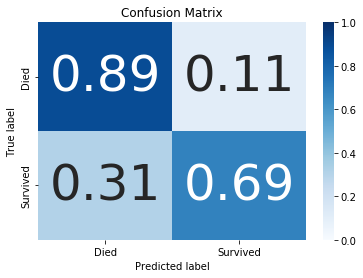

In [5]:
cm = confusion_matrix(y_train, y_pred)
util.plot_confusion_matrix(cm)

In [6]:
util.print_model_metrics(cm)

True positive rate is:  [0.89295775 0.68691589]
Precision rate is:  [0.82552083 0.79459459]
False posivitive rate is:  [0.31308411 0.10704225]


In [7]:
# log loss on training
print("Log loss on training: ", log_loss(y_train, Y_pred_prob))

# log loss on validation data
print("Log loss on validation: ", log_loss(y_valid, y_pred_val_prob))

Log loss on training:  0.4490169758079842
Log loss on validation:  0.5253992457099844


# Doing some hyperparameter tuning for ou regression model

In [8]:
C_params = np.geomspace(1e-5, 1e5, 20)
Acc_train = []
Acc_valid = []
LogLoss_train = []
LogLoss_valid = []

for c in C_params:
    model = LogisticRegression(max_iter=10000, solver='saga', C=c)
    model.fit(x_train, y_train)

    ac_train = model.score(x_train, y_train)
    Acc_train.append(ac_train)

    ac_val = model.score(x_valid, y_valid)
    Acc_valid.append(ac_val)

    pred_prob_t = model.predict_proba(x_train)
    log_loss_t = log_loss(y_train, pred_prob_t)
    LogLoss_train.append(log_loss_t)

    pred_prob_v = model.predict_proba(x_valid)
    log_loss_v = log_loss(y_valid, pred_prob_v)
    LogLoss_valid.append(log_loss_v)

    print(f"C param {c} has accuracy of {ac_train}/{ac_val} and log loss of {log_loss_t}/{log_loss_v}")

C param 1e-05 has accuracy of 0.671353251318102/0.647887323943662 and log loss of 0.626534879171318/0.6477325637466875
C param 3.359818286283781e-05 has accuracy of 0.6695957820738138/0.6549295774647887 and log loss of 0.6202213426970297/0.648247339095055
C param 0.00011288378916846884 has accuracy of 0.6660808435852372/0.6690140845070423 and log loss of 0.6193030203271505/0.6505922154419164
C param 0.000379269019073225 has accuracy of 0.6766256590509666/0.6830985915492958 and log loss of 0.611953868693377/0.6478690833066774
C param 0.0012742749857031334 has accuracy of 0.6942003514938488/0.6901408450704225 and log loss of 0.5913712583094758/0.6331676343179354
C param 0.004281332398719391 has accuracy of 0.7240773286467487/0.6901408450704225 and log loss of 0.5542038124651916/0.6038022450407209
C param 0.01438449888287663 has accuracy of 0.7557117750439367/0.7253521126760564 and log loss of 0.5061280209095586/0.564691447039698
C param 0.04832930238571752 has accuracy of 0.8101933216168

In [9]:
acc_train_arr = np.array(Acc_train).reshape(20,)
acc_valid_arr = np.array(Acc_valid).reshape(20,)
log_loss_train_arr = np.array(LogLoss_train).reshape(20,)
log_loss_valid_arr = np.array(LogLoss_valid).reshape(20,)

res = zip(C_params, acc_train_arr, acc_valid_arr, log_loss_train_arr, log_loss_valid_arr)

df = pd.DataFrame(res, columns=["C Param", "Accuracy Train", "Accuracy Valid", "Log Loss Train", "Log Loss Valid"])
df

,C Param,Accuracy Train,Accuracy Valid,Log Loss Train,Log Loss Valid
0,0.000010,0.671353,0.647887,0.626535,0.647733
1,0.000034,0.669596,0.654930,0.620221,0.648247
2,0.000113,0.666081,0.669014,0.619303,0.650592
3,0.000379,0.676626,0.683099,0.611954,0.647869
4,0.001274,0.694200,0.690141,0.591371,0.633168
5,0.004281,0.724077,0.690141,0.554204,0.603802
6,0.014384,0.755712,0.725352,0.506128,0.564691
7,0.048329,0.810193,0.753521,0.470260,0.537573
8,0.162378,0.810193,0.774648,0.454913,0.528110
9,0.545559,0.815466,0.788732,0.449973,0.525781


In [10]:
df.sort_values("Log Loss Valid", ascending=True).reset_index()

,index,C Param,Accuracy Train,Accuracy Valid,Log Loss Train,Log Loss Valid
0,17,8858.667904,0.811951,0.788732,0.447863,0.524981
1,16,2636.650899,0.813708,0.788732,0.447865,0.524982
2,15,784.759970,0.813708,0.788732,0.447869,0.524983
3,18,29763.514416,0.813708,0.788732,0.447869,0.524984
4,19,100000.000000,0.813708,0.788732,0.447869,0.524985
5,14,233.572147,0.813708,0.788732,0.447873,0.524985
6,13,69.519280,0.813708,0.788732,0.447884,0.524988
7,12,20.691381,0.813708,0.788732,0.447922,0.525002
8,11,6.158482,0.813708,0.788732,0.448054,0.525047
9,10,1.832981,0.815466,0.788732,0.448491,0.525202


# Now creating a test model with the best calculated C_Param

In [11]:
testModel = LogisticRegression(C=29763.514416, max_iter=10000, solver="saga")
testModel.fit(x_train, y_train)
print("Accuracy ", testModel.score(x_valid, y_valid))

Accuracy  0.7887323943661971


# Running some cross validation

In [12]:
kf = KFold(n_splits=10)
model_cv = LogisticRegressionCV(cv=kf, Cs=C_params, max_iter=10000)
model_cv.fit(x_train, y_train)

print("Accuracy ", model_cv.score(x_valid, y_valid))

red_prob_v = model.predict_proba(x_valid)
print("Log Loss ", log_loss(y_valid, pred_prob_v))

print("Optimal C param ", model_cv.C_)

Accuracy  0.7605633802816901
Log Loss  0.5249845233147877
Optimal C param  [0.0483293]


C param 1e-05 has accuracy of 0.671353251318102/0.647887323943662 and log loss of 0.6265347120466707/0.6477325364738119


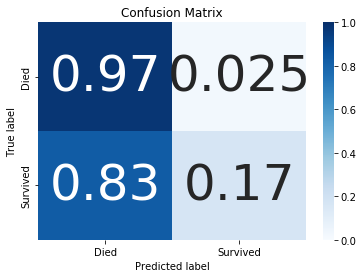

C param 3.359818286283781e-05 has accuracy of 0.6678383128295254/0.6549295774647887 and log loss of 0.6201416748310081/0.6482656756713281


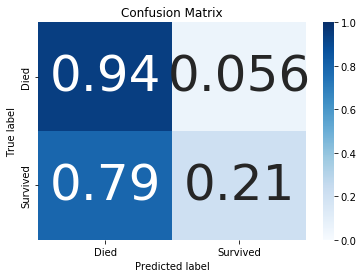

C param 0.00011288378916846884 has accuracy of 0.664323374340949/0.6690140845070423 and log loss of 0.6191611565364004/0.6505296739987794


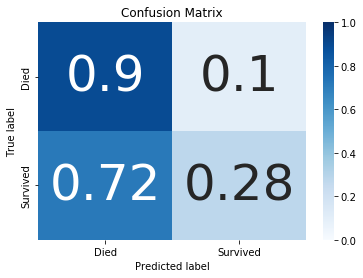

C param 0.000379269019073225 has accuracy of 0.6766256590509666/0.6830985915492958 and log loss of 0.6119557313856786/0.6478699612868237


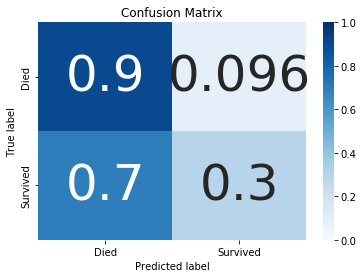

C param 0.0012742749857031334 has accuracy of 0.6942003514938488/0.6901408450704225 and log loss of 0.5913708549865789/0.6331670551806389


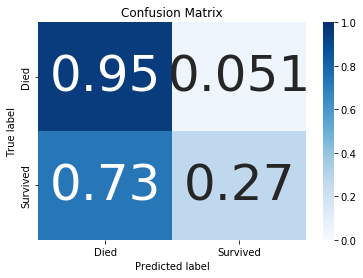

C param 0.004281332398719391 has accuracy of 0.7240773286467487/0.6901408450704225 and log loss of 0.5542009182217144/0.6038000448665753


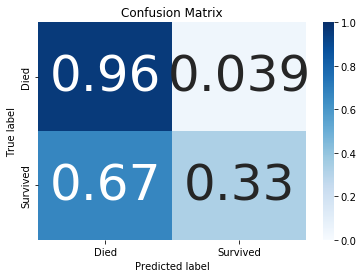

C param 0.01438449888287663 has accuracy of 0.7557117750439367/0.7253521126760564 and log loss of 0.5061281516819325/0.5646921442908222


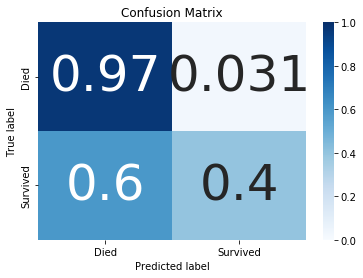

C param 0.04832930238571752 has accuracy of 0.8101933216168717/0.7535211267605634 and log loss of 0.47026028184347357/0.5375734298606386


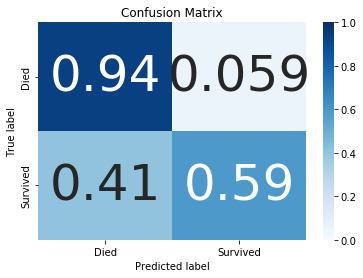

C param 0.1623776739188721 has accuracy of 0.8101933216168717/0.7746478873239436 and log loss of 0.45491227554219843/0.5281091304991897


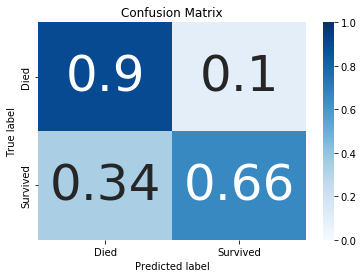

C param 0.5455594781168515 has accuracy of 0.8154657293497364/0.7887323943661971 and log loss of 0.4499712580285783/0.5257798741920864


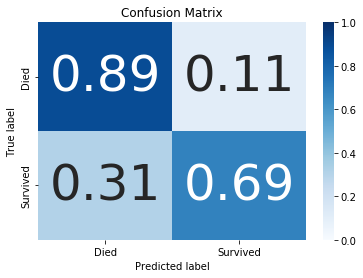

C param 1.8329807108324339 has accuracy of 0.8154657293497364/0.7887323943661971 and log loss of 0.44849073774958514/0.525202508686852


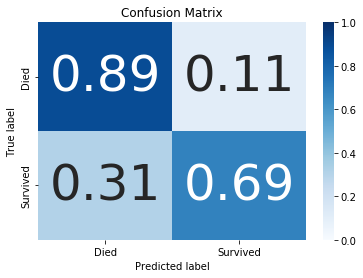

C param 6.1584821106602545 has accuracy of 0.8137082601054482/0.7887323943661971 and log loss of 0.4480540549570521/0.5250483580963164


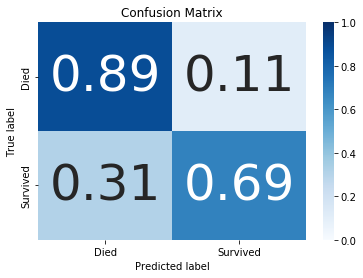

C param 20.6913808111479 has accuracy of 0.8137082601054482/0.7887323943661971 and log loss of 0.4479205797721422/0.5250006669940963


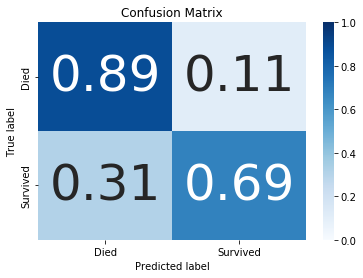

C param 69.51927961775606 has accuracy of 0.8137082601054482/0.7887323943661971 and log loss of 0.4478845687841053/0.5249884405340941


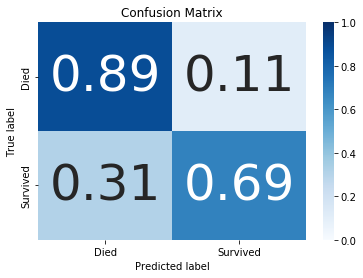

C param 233.57214690901213 has accuracy of 0.8137082601054482/0.7887323943661971 and log loss of 0.4478722244904455/0.5249851071433691


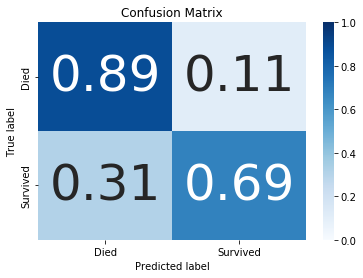

C param 784.7599703514607 has accuracy of 0.8137082601054482/0.7887323943661971 and log loss of 0.4478655639559851/0.5249813332586961


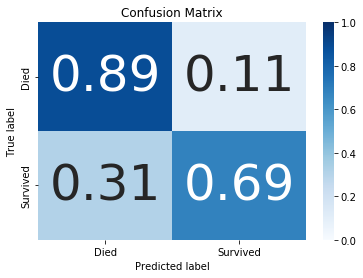

C param 2636.6508987303555 has accuracy of 0.8137082601054482/0.7887323943661971 and log loss of 0.4478659568647311/0.5249821107195137


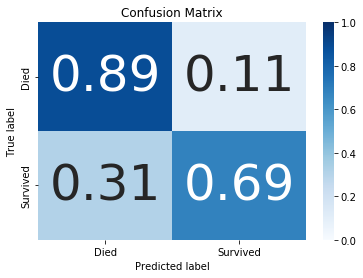

C param 8858.667904100832 has accuracy of 0.8137082601054482/0.7887323943661971 and log loss of 0.447869331827299/0.5249839787870473


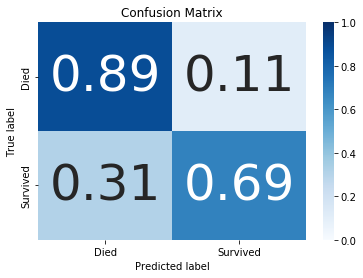

C param 29763.51441631313 has accuracy of 0.8137082601054482/0.7887323943661971 and log loss of 0.44786328540641507/0.5249804886175938


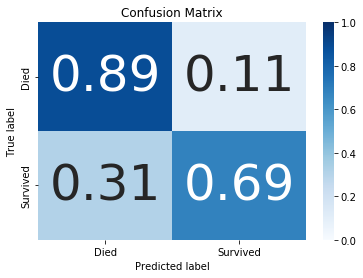

C param 100000.0 has accuracy of 0.8137082601054482/0.7887323943661971 and log loss of 0.4478678967455698/0.5249838823358716


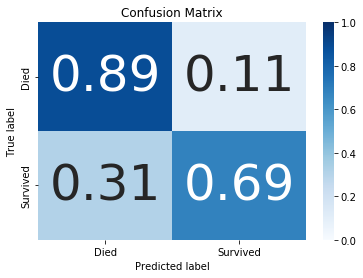

In [14]:
C_params = np.geomspace(1e-5, 1e5, 20)
Acc_train = []
Acc_valid = []
LogLoss_train = []
LogLoss_valid = []

for c in C_params:
    model = LogisticRegression(max_iter=10000, solver='saga', C=c)
    model.fit(x_train, y_train)

    ac_train = model.score(x_train, y_train)
    Acc_train.append(ac_train)

    ac_val = model.score(x_valid, y_valid)
    Acc_valid.append(ac_val)

    pred_prob_t = model.predict_proba(x_train)
    log_loss_t = log_loss(y_train, pred_prob_t)
    LogLoss_train.append(log_loss_t)

    pred_prob_v = model.predict_proba(x_valid)
    log_loss_v = log_loss(y_valid, pred_prob_v)
    LogLoss_valid.append(log_loss_v)

    print(f"C param {c} has accuracy of {ac_train}/{ac_val} and log loss of {log_loss_t}/{log_loss_v}")
    y_pred = model.predict(x_train)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1, 1)
    util.plot_confusion_matrix(cm_norm)
    plt.show()

In [15]:
finalModel = LogisticRegression(C=29763.514416, max_iter=10000, solver="saga")
finalModel.fit(x_train_valid, y_train_valid)

score = finalModel.score(x_test, y_test)
y_pred_prob = finalModel.predict_proba(x_test)

print("Accuracy :", score)
print("Log Loss :", log_loss(y_test, y_pred_prob))
print("Training Score :", finalModel.score(x_train_valid, y_train_valid))

Accuracy : 0.7921348314606742
Log Loss : 0.49284593896887374
Training Score : 0.7960618846694796


True positive rate is:  [0.86538462 0.68918919]
Precision rate is:  [0.79646018 0.78461538]
False posivitive rate is:  [0.31081081 0.13461538]


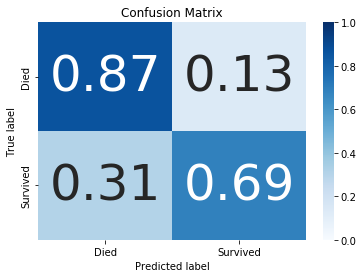

In [16]:
y_pred = finalModel.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
util.print_model_metrics(cm)
util.plot_confusion_matrix(cm)